In [14]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [15]:
#importing dataset and extracting the independent and dependent variable
companies=pd.read_csv("/content/1000_Companies.csv")


In [16]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
X=companies.iloc[:,:-1].values
#X=companies.drop(columns='Profit').values
Y=companies.iloc[:,-1].values
#Y=companies['Profit'].values

In [19]:
#find index of state column
state_column_index=companies.columns.get_loc('State')
#Encoding categorical data
column_transformer=ColumnTransformer(transformers=[('State',OneHotEncoder(drop='first'),[state_column_index])],remainder='passthrough')

In [20]:
# Apply the transformations to the features
X=column_transformer.fit_transform(X)

In [26]:
# Step 4: Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [27]:
# Step 5: Fit the linear regression model
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [28]:
# Step 6: Predicting the test set results
Y_pred=regressor.predict(X_test)

In [29]:
# Step 7: Calculating the accuracy metrics
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)

In [30]:
# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 192148061.81505656
R² Score: 0.9112695892268908


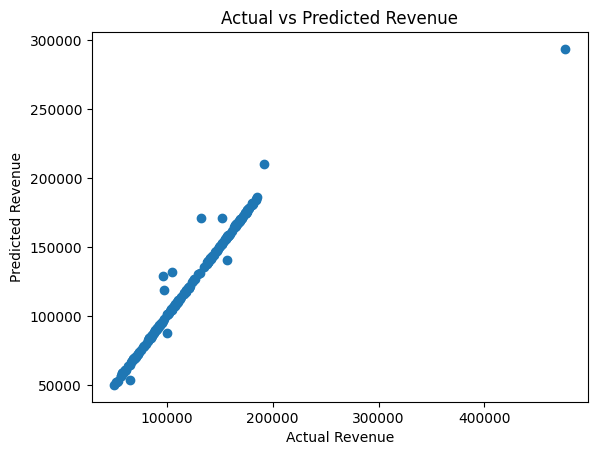

In [32]:
# Step 8: Visualizing the results
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()

In [33]:
# Optional: Plotting the heatmap for correlation
# Recreate the DataFrame after encoding to visualize the correlation
encoded_columns = column_transformer.get_feature_names_out()
encoded_df = pd.DataFrame(X, columns=encoded_columns)
encoded_df['Profit'] = companies['Profit']

In [34]:
# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

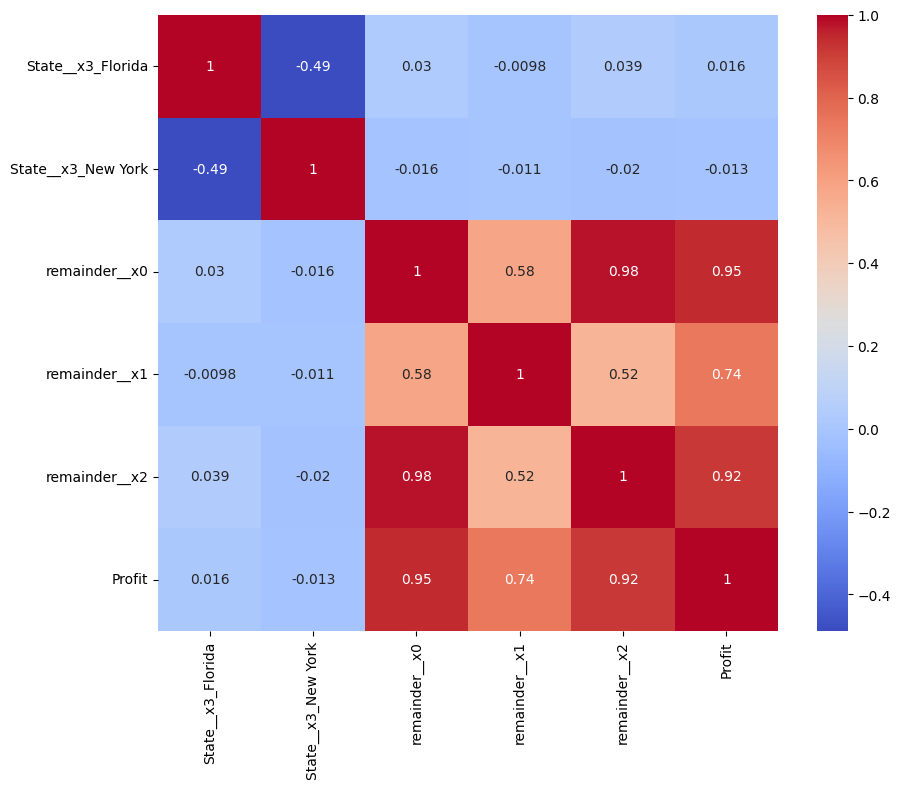

In [35]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()